In [1]:
 
import pandas as pd
 

import plotly
from plotly.graph_objs import Bar
 
import joblib
from sqlalchemy import create_engine

In [2]:
# load SQL database/table
engine = create_engine('sqlite:///../data/DisasterResponse.db') # specify the SQL database  
df = pd.read_sql_table('Disaster', con = engine) # specify the SQL table (not database) 


In [9]:
df.head(10)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [8]:
print(df.shape)
df.info()

(26215, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26215 entries, 0 to 26214
Data columns (total 40 columns):
id                        26215 non-null int64
message                   26215 non-null object
original                  10170 non-null object
genre                     26215 non-null object
related                   26215 non-null int64
request                   26215 non-null int64
offer                     26215 non-null int64
aid_related               26215 non-null int64
medical_help              26215 non-null int64
medical_products          26215 non-null int64
search_and_rescue         26215 non-null int64
security                  26215 non-null int64
military                  26215 non-null int64
child_alone               26215 non-null int64
water                     26215 non-null int64
food                      26215 non-null int64
shelter                   26215 non-null int64
clothing                  26215 non-null int64
money                     2621

In [15]:
# check genre and request
df.groupby(['genre', 'request'])['id'].count()

genre   request
direct  0           7070
        1           3696
news    0          12450
        1            604
social  0           2221
        1            174
Name: id, dtype: int64

In [12]:
# check genre and related
df.groupby(['genre', 'related'])['id'].count()

genre   related
direct  0           3452
        1           7314
news    0           2365
        1          10689
social  0            305
        1           2090
Name: id, dtype: int64

In [13]:
# check genre and death
df.groupby(['genre', 'death'])['id'].count()

genre   death
direct  0        10512
        1          254
news    0        12196
        1          858
social  0         2313
        1           82
Name: id, dtype: int64

In [14]:
# check genre and missing_people
df.groupby(['genre', 'missing_people'])['id'].count()

genre   missing_people
direct  0                 10680
        1                    86
news    0                 12889
        1                   165
social  0                  2348
        1                    47
Name: id, dtype: int64

In [34]:
# Calculate message count by genre and requested status    
genre_requested = df[df['request']==1].groupby('genre')['message'].count().reset_index()
genre_not_requested = df[df['request']==0].groupby('genre')['message'].count().reset_index()
genre_names = list(genre_requested.index)
   

# Calculate message count by genre and death/missing people 
genre_death = df[df['death']==1].groupby('genre')['message'].count().reset_index() 
genre_missing_people = df[df['missing_people']==1].groupby('genre')['message'].count().reset_index() 
genre_names = list(genre_death.index) 
    
print('Requested\n')
print(genre_requested)
print('Not Requested\n')
genre_not_requested


Requested

    genre  message
0  direct     3696
1    news      604
2  social      174
Not Requested



,genre,message
0,direct,7070
1,news,12450
2,social,2221


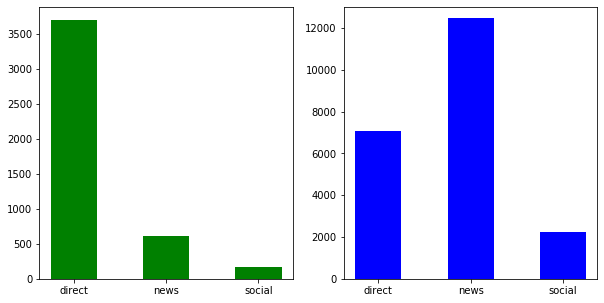

In [45]:
 # create visuals
import matplotlib.pyplot as plt
%matplotlib inline

fig,(ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
plt.ylim(ymax = 13000, ymin = 0)

ax1.bar( 'genre', 'message' , data =genre_requested , color = 'green' , width = 0.5) 
     
ax2.bar( 'genre', 'message' , data =genre_not_requested , color = 'blue' , width = 0.5) 
  
plt.show()

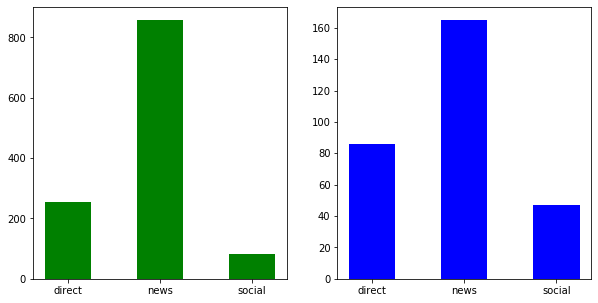

In [48]:
# create visuals
import matplotlib.pyplot as plt
%matplotlib inline

fig,(ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.bar( 'genre', 'message' , data =genre_death , color = 'green' , width = 0.5) 
     
ax2.bar( 'genre', 'message' , data =genre_missing_people , color = 'blue' , width = 0.5) 
  
plt.show()